In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# to load dataset
df=pd.read_csv("Ecommerce.csv")
# to show first 5 records
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# to check how many rows and columns
df.shape

(10999, 12)

In [4]:
# to check null values
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
# crosscheck null values checking datatype
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
# to check duplicated values
df.duplicated().sum()

0

In [9]:
# check if dataset is balanced or not
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

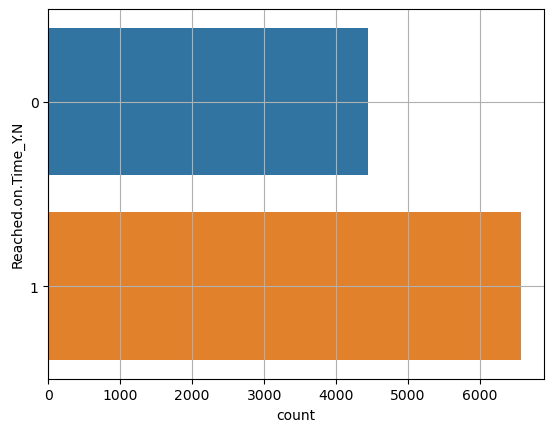

In [10]:
sns.countplot(data=df,y="Reached.on.Time_Y.N")
plt.grid(True)
plt.show()

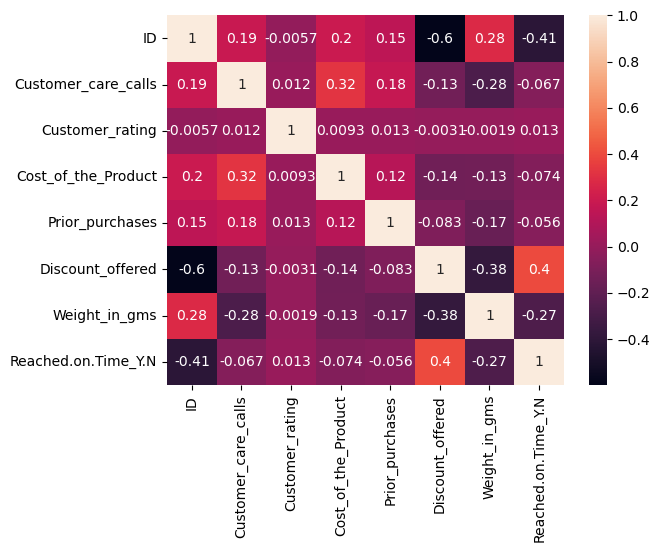

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

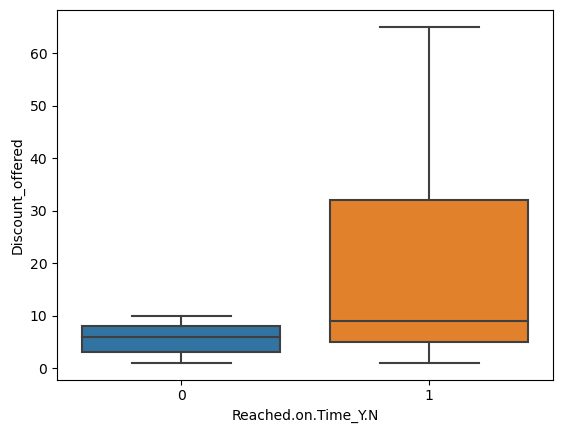

In [12]:
sns.boxplot(data=df,x='Reached.on.Time_Y.N',y='Discount_offered')
plt.show()

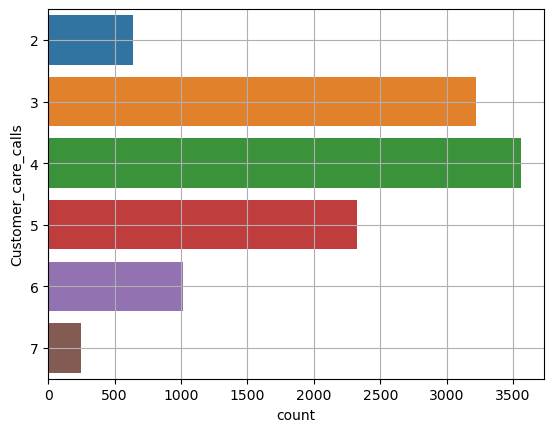

In [13]:
sns.countplot(data=df,y="Customer_care_calls")
plt.grid(True)
plt.show()

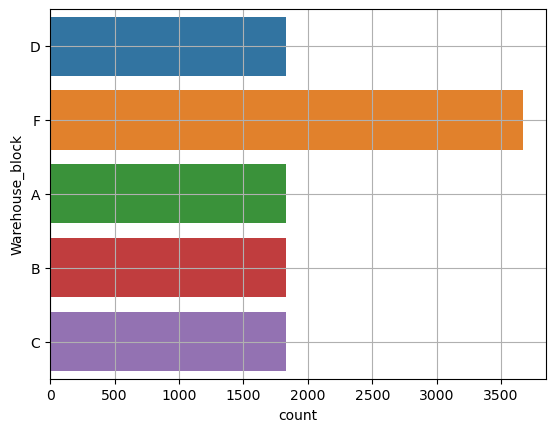

In [14]:
sns.countplot(data=df,y="Warehouse_block")
plt.grid(True)
plt.show()
#here we can see that the F warehouse_block has max capacity of storage

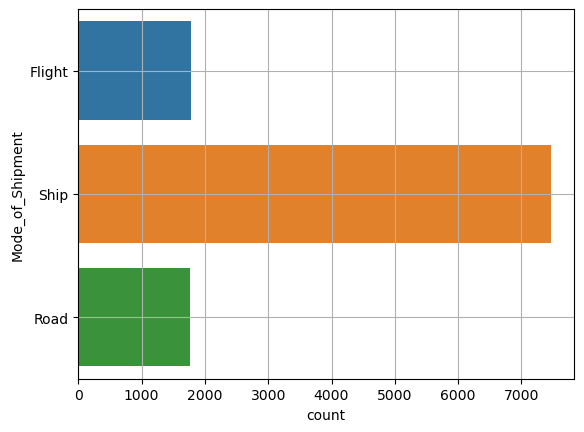

In [15]:
sns.countplot(data=df,y="Mode_of_Shipment")
plt.grid(True)
plt.show()
#here we can see that ship is the common used mode of shipment with over 7000 shipments sent through it

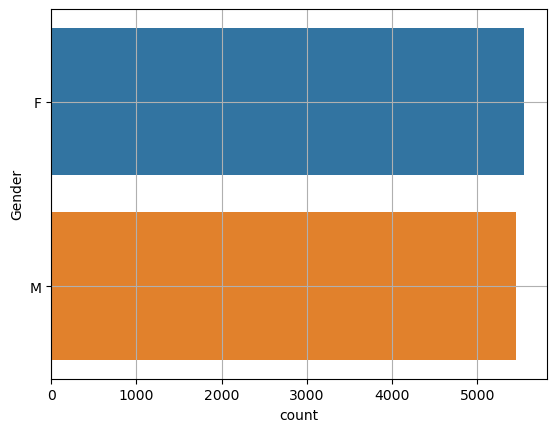

In [16]:
sns.countplot(data=df,y="Gender")
plt.grid(True)
plt.show()

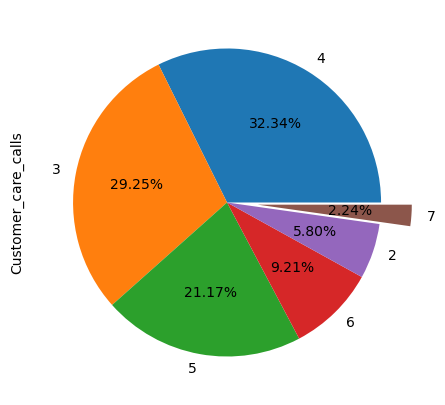

In [17]:
explode=[0,0,0,0,0,0.2]
df["Customer_care_calls"].value_counts().plot(figsize=(5,5),kind="pie",autopct='%.2f%%',explode=explode)
plt.show()
#here we can see most of 3-4 times customer called to customer care for order related thing

In [18]:
# create df_cat to hold object type data
df_cat=df.select_dtypes(object)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Warehouse_block     10999 non-null  object
 1   Mode_of_Shipment    10999 non-null  object
 2   Product_importance  10999 non-null  object
 3   Gender              10999 non-null  object
dtypes: object(4)
memory usage: 343.8+ KB


In [19]:
# create df_num to hold numeric type data
df_num=df.select_dtypes("int64")
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Customer_care_calls  10999 non-null  int64
 2   Customer_rating      10999 non-null  int64
 3   Cost_of_the_Product  10999 non-null  int64
 4   Prior_purchases      10999 non-null  int64
 5   Discount_offered     10999 non-null  int64
 6   Weight_in_gms        10999 non-null  int64
 7   Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(8)
memory usage: 687.6 KB


In [20]:
# apply label encoder in df_cat to convert object type data into numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder
le.fit_transform
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[[col]])

In [21]:
df_cat.dtypes

Warehouse_block       int32
Mode_of_Shipment      int32
Product_importance    int32
Gender                int32
dtype: object

In [22]:
# to concat categorical and numerical data
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head(20)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,1,4,2,177,3,44,1233,1,3,0,1,0
1,2,4,5,216,2,59,3088,1,4,0,1,1
2,3,2,2,183,4,48,3374,1,0,0,1,1
3,4,3,3,176,4,10,1177,1,1,0,2,1
4,5,2,2,184,3,46,2484,1,2,0,2,0
5,6,3,1,162,3,12,1417,1,4,0,2,0
6,7,3,4,250,3,3,2371,1,3,0,1,0
7,8,4,1,233,2,48,2804,1,4,0,1,0
8,9,3,4,150,3,11,1861,1,0,0,1,0
9,10,3,2,164,3,29,1187,1,1,0,2,0


In [23]:
# select input and output
x=df_new.drop('Reached.on.Time_Y.N',axis=1)
y=df_new['Reached.on.Time_Y.N']

In [24]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((7699, 11), (7699,), (3300, 11), (3300,))

In [26]:
x_train.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
4177,4178,4,5,149,3,9,4953,4,2,1,1
1616,1617,3,4,121,3,63,1611,0,2,1,0
2775,2776,4,1,178,3,19,1906,1,2,1,1
10272,10273,4,4,160,3,5,4440,3,0,2,1
6836,6837,4,3,247,3,1,5214,0,1,0,0


In [27]:
# apply StandardScaler on x_train and x_test
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [28]:
#Create a function 

def create_model(model):
    
    #train the model 
    model.fit(x_train,y_train)
    
    #Test the data with 30%
    y_pred=model.predict(x_test)
    
    #Generate the Report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.56      0.60      0.58      1342
           1       0.71      0.68      0.70      1958

    accuracy                           0.65      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300

[[ 800  542]
 [ 621 1337]]


In [31]:
# here recall is 0.68 means 68% 
# Here score is good. It can be better ,for that apply DecisionTreeClassifier class
# Because DTC help to select imp input features with the help of Gini Index or Entropy 
# Perfrom dataset with the help of DecisionTreeClassifier class
# call DecisionTreeClassifier class

# DecisionTreeClassifier

In [32]:
from sklearn.tree import  DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.57      0.56      0.56      1342
           1       0.70      0.71      0.70      1958

    accuracy                           0.65      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.65      0.65      0.65      3300

[[ 751  591]
 [ 573 1385]]


In [33]:
#create a dictionary for visualisation on imp col with actual col

dict={'input columns':x.columns,'Features':dt.feature_importances_}
a=pd.DataFrame(dict)
a

,input columns,Features
0,ID,0.411468
1,Customer_care_calls,0.044198
2,Customer_rating,0.046944
3,Cost_of_the_Product,0.123850
4,Prior_purchases,0.036750
5,Discount_offered,0.061150
6,Weight_in_gms,0.162325
7,Warehouse_block,0.044499
8,Mode_of_Shipment,0.025712
9,Product_importance,0.024148


In [34]:
#Arrange values in descending orders to check the highest values of rows
df_=a.sort_values('Features',ascending=False,ignore_index=True)
df_

,input columns,Features
0,ID,0.411468
1,Weight_in_gms,0.162325
2,Cost_of_the_Product,0.123850
3,Discount_offered,0.061150
4,Customer_rating,0.046944
5,Warehouse_block,0.044499
6,Customer_care_calls,0.044198
7,Prior_purchases,0.036750
8,Mode_of_Shipment,0.025712
9,Product_importance,0.024148


In [35]:
# here we got 71% score which is good
# reason behind less score, overfit means model is overfit so reduced the overfitting situation:-
# we use pruning technique.
# There are 2 types of pruning technique
#1. max_depth
#2. min_samples_leaf 

# pruning technique

In [36]:
#max_depth<=8
dt1=DecisionTreeClassifier(random_state=1,max_depth=3)
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.57      1.00      0.73      1342
           1       1.00      0.49      0.65      1958

    accuracy                           0.70      3300
   macro avg       0.79      0.74      0.69      3300
weighted avg       0.83      0.70      0.68      3300

[[1342    0]
 [1005  953]]


In [37]:
# min_samples_leaf
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1342
           1       0.72      0.70      0.71      1958

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.66      0.66      3300

[[ 808  534]
 [ 594 1364]]


In [38]:
#max_depth<=8
dt3=DecisionTreeClassifier(criterion="entropy",random_state=1,max_depth=8)
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.57      0.92      0.71      1342
           1       0.91      0.53      0.67      1958

    accuracy                           0.69      3300
   macro avg       0.74      0.72      0.69      3300
weighted avg       0.77      0.69      0.68      3300

[[1234  108]
 [ 920 1038]]


In [39]:
# min_samples_leaf
dt4=DecisionTreeClassifier(criterion="entropy",random_state=1,min_samples_leaf=15)
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1342
           1       0.72      0.69      0.70      1958

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.66      0.66      3300

[[ 821  521]
 [ 613 1345]]


In [40]:
#conclusion : 
#Decision Tree Classifier with GINI Index :
#applied Pruning Tech : 1. max_depth with GINI INDEX then got 
#Accurancy  0: 1 and 1: 0.49 and max_depth=3
#applied pruning tech. 2. min_samples_leaf with GINI INDEX then got 
#Accurancy  0: 0.60  and 1: 0.70  and min_samples_leaf=45

#Decision Tree Classifier with entropy :
#applied Pruning Tech : 1. max_depth with entropy then got 
#Accurancy  0: 0.92 and 1: 0.53 and max_depth=8
#applied pruning tech. 2. min_samples_leaf with entropy then got 
#Accurancy  0: 0.61  and 1: 0.69  and min_samples_leaf=15

# RANDOM FOREST TREE

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=15,max_features=5,random_state=1)
#n_estimators means how many decisiontrees min=10 ,max=100
#max_features means take how many inputs
#bydefalut it took GINI INDEX   
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1342
           1       0.72      0.67      0.70      1958

    accuracy                           0.65      3300
   macro avg       0.64      0.65      0.65      3300
weighted avg       0.66      0.65      0.65      3300

[[ 844  498]
 [ 649 1309]]


In [52]:
# use entropy
rfc=RandomForestClassifier(n_estimators=15,max_features=8,random_state=1,criterion="entropy")
rfc=create_model(rfc)

'''for i in range(8,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=15,max_features=i,random_state=1,criterion="entropy")
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)'''

              precision    recall  f1-score   support

           0       0.57      0.65      0.61      1342
           1       0.73      0.66      0.69      1958

    accuracy                           0.66      3300
   macro avg       0.65      0.66      0.65      3300
weighted avg       0.67      0.66      0.66      3300

[[ 874  468]
 [ 668 1290]]


'for i in range(8,0,-1):\n    #create object for RandomForestClassifier class\n    rfc=RandomForestClassifier(n_estimators=15,max_features=i,random_state=1,criterion="entropy")\n    print("no of features:",i)\n    #call the function\n    rfc=create_model(rfc)'

In [53]:
#random forest  with gini Index :   0=0.63 and 1=0.67 fe=5
# random forest with entropy Index :   0=0.65 and 1=0.66 fe=15

# Boosting Technique

In [60]:
#apply ADA boost on given dataset
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=40,random_state=1)  # n_estimators can be <= 100
ada=create_model(ada)
'''for i in range(1,100,5):
    #create object for RandomForestClassifier class
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    ada=create_model(ada)'''

              precision    recall  f1-score   support

           0       0.57      0.91      0.70      1342
           1       0.90      0.53      0.67      1958

    accuracy                           0.69      3300
   macro avg       0.73      0.72      0.69      3300
weighted avg       0.76      0.69      0.68      3300

[[1222  120]
 [ 913 1045]]


'for i in range(1,100,5):\n    #create object for RandomForestClassifier class\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("no of descision stump:",i)\n    #call the function\n    ada=create_model(ada)'

In [61]:
#conclusion :#adaboosting  recall score :   0=0.91 and 1=0.53 on decision stump:40

In [88]:
#Gradient Boosting :
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=10,random_state=1)  # n_estimators can be <= 100
gbc=create_model(gbc)

'''for i in range(1,101,5):
    #create object for RandomForestClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    gbc=create_model(gbc)'''

              precision    recall  f1-score   support

           0       0.58      0.77      0.66      1342
           1       0.79      0.62      0.69      1958

    accuracy                           0.68      3300
   macro avg       0.69      0.69      0.68      3300
weighted avg       0.71      0.68      0.68      3300

[[1029  313]
 [ 749 1209]]


'for i in range(1,101,5):\n    #create object for RandomForestClassifier class\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print("no of descision stump:",i)\n    #call the function\n    gbc=create_model(gbc)'

In [70]:
#conclusion :gradientboosting  recall score :   0=0.31 and 1=0.84 on decision stump:9

# Extreme Gradient Boosting(XGB)

In [71]:
!pip install xgboost 

Defaulting to user installation because normal site-packages is not writeable


In [76]:
from xgboost import XGBClassifier
xgc=XGBClassifier(n_estimators=83,reg_alpha=1,random_state=1)    
#automatic overftting : reg means regualrization  and alpha means hyperpermater
#n_estimators means no. of iteration of decision stump can be <=100_estimators 
xgc=create_model(xgc)

'''for i in range(1,101,5):
    #create object for RandomForestClassifier class
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("no of descision stump:",i)
    #call the function
    xgc=create_model(xgc)'''

              precision    recall  f1-score   support

           0       0.57      0.66      0.61      1342
           1       0.74      0.66      0.69      1958

    accuracy                           0.66      3300
   macro avg       0.65      0.66      0.65      3300
weighted avg       0.67      0.66      0.66      3300

[[ 882  460]
 [ 671 1287]]


'for i in range(1,101,5):\n    #create object for RandomForestClassifier class\n    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)\n    print("no of descision stump:",i)\n    #call the function\n    xgc=create_model(xgc)'

In [77]:
#conclusion :extreme gradientboosting  recall score :   0=0.66 and 1=0.66 on decision stump:83

# Support Vector Machine

In [78]:
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1)     #bydefault hard margin
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.57      0.62      0.60      1342
           1       0.72      0.68      0.70      1958

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.66      0.66      3300

[[ 836  506]
 [ 632 1326]]


In [82]:
svc1=LinearSVC(random_state=1,C=0.1) #soft margin
#here C is parameter which is used to add some error during training time c<=1
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.57      0.62      0.60      1342
           1       0.72      0.68      0.70      1958

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.66      0.66      3300

[[ 837  505]
 [ 632 1326]]


# KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
#bydefault the n_neighbors is 5 (always odd )
#p=2 means eucliden metric.
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.57      0.60      0.58      1342
           1       0.72      0.70      0.71      1958

    accuracy                           0.66      3300
   macro avg       0.64      0.65      0.65      3300
weighted avg       0.66      0.66      0.66      3300

[[ 799  543]
 [ 593 1365]]


In [89]:
#observation: in kneighborsclassifier the recall accuracy is 0=0.60 1=0.70

#conclusion: we get best score for 0=0.56 and 1=0.71 in Decision Tree Classifier